<a href="https://colab.research.google.com/github/Ektagavas/CVSummerSchool2021/blob/main/VAE/Expt2_VarApproxJensen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment-2: 

### Preliminaries
###Variational approximation


**Variational approximation** is a popular method for function approximation that is used a widely used in many fields including Machine learning and Statistics. It takes the name from its origin in the calculus of variations. The approximation generally involves estimating the original function with comparatively simpler function albeit at the cost of introducing new auxilliary variables. Here, we will discuss variational approximation with a couple of simple examples.

In [1]:
##########################
# Import necessary modules
##########################

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Let's consider the simple example of the **logarithmic function**.

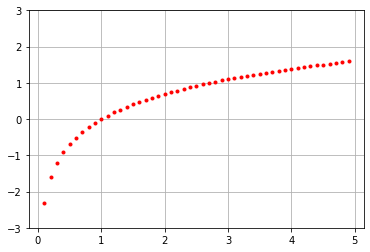

In [2]:
#################################
# Function: Logarithm  [ log(x) ]
#################################

x = np.expand_dims(np.arange(0.1,5,0.1),0)

plt.plot(x,np.log(x),'.r')
plt.ylim([-3,3])
plt.grid(True)
plt.show()

The logarithmic function $\log(x)$ can be represented variationally as follows, $$\log(x) = \min_{\lambda}\{\lambda x-\log(\lambda)-1\}.$$ You can verify analytically that this indeed is a correct representation for the logarithmic function. In this representation, $\lambda$ is the variational parameter and in order to evaluate the function $\log(x)$ for any $x$, we need to solve the minimization with respect to $\lambda$ for the given $x$. In this case, it can be verified that for any given $x$, the corresponding $\lambda$ would be $1/x$. Let us plot the local variational approximation to the logarithmic function at a given x. 

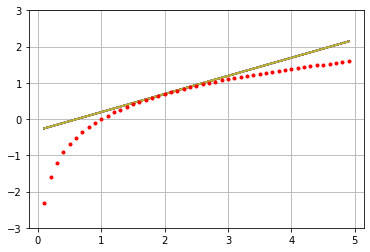

In [4]:
#################################################################
# Variational approximation to Logarithm  (Evaluation at a point)
#################################################################

x = np.expand_dims(np.arange(0.1,5,0.1),0)

x0 = 2.     # Evaluate the variational approximation at x=2

lambd = 1/x0    # compute lambda for x0
f_lambda = x.T*lambd - np.tile(np.log(lambd)+1,[x.shape[0],1]);   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.plot(x,np.log(x),'.r')
plt.ylim([-3,3])
plt.grid(True)
plt.show()

As can be observed, the local variational approximation is a linear function which is also an upper-bound to the logarithmic function. Now, let us plot the local variational approximation to the logarithmic function at various points in the domain. 

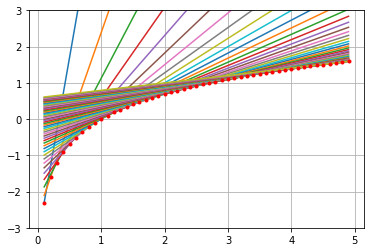

In [6]:
####################################################################
# Variational approximation to Logarithm  (Envelope of upper-bounds)
####################################################################

x = np.expand_dims(np.arange(0.1,5,0.1),0)

lambd = 1/x    # compute lambda for all x
f_lambda = x.T*lambd - np.tile(np.log(lambd)+1,[x.shape[0],1]);   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.plot(x,np.log(x),'.r')
plt.ylim([-3,3])
plt.grid(True)
plt.show()

As can be seen in the figure above, the variational upper-bounds form a tight upper-envelope on the logarithmic function. This is actually a property of not only the logarithmic function but all concave functions, that, you can have such tight upper-bounding hyper-planes (called supporting hyper-planes) at any point in the domain of a concave function.

Now, let us consider the a slightly more complicated function, the logistic function $1/(1+e^{-x})$.

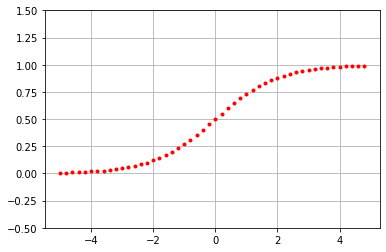

In [7]:
#######################################
# Function: Logistic  [ 1/(1+exp(-x)) ]
#######################################

x = np.expand_dims(np.arange(-5,5,0.2),0)

plt.plot(x,1/(1+np.exp(-x)),'.r')
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.show()


The logarithmic function $\log(x)$ can be represented variationally as follows, $$\log(x) = \min_{\lambda}\{e^{\lambda x-H(\lambda)}\}.$$ Where, $H(\lambda)=-\lambda\log(\lambda)-(1-\lambda)\log(1-\lambda)$. In this case, it can be verified that for any given $x$, the corresponding $\lambda$ can be evaluated as $1/(1+e^x)$. Let us plot the local variational approximation to the logistic function at a given x. 

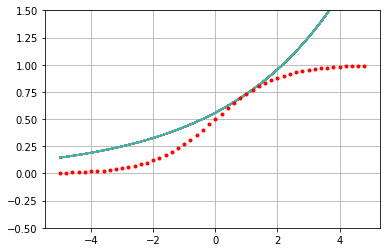

In [8]:
################################################################
# Variational approximation to Logistic  (Evaluation at a point)
################################################################

x = np.expand_dims(np.arange(-5,5,0.2),0)

x0 = 1.

lambd = 1/(1+np.exp(x0))  # compute lambda for x0

intercept = np.tile( -lambd*np.log(lambd) -(1-lambd)*np.log(1-lambd),[x.shape[0],1])
f_lambda = np.exp(x.T*lambd - intercept)   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.plot(x,1/(1+np.exp(-x)),'.r')
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.show()


As can be observed, the local variational approximation is an exponential function which is also an upper-bound to the logistic function. Now, let us plot the local variational approximation to the logistic function at various points in the domain. 

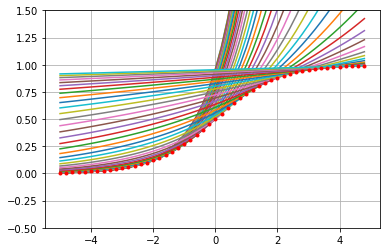

In [9]:
###################################################################
# Variational approximation to Logistic  (Envelope of upper-bounds)
###################################################################

x = np.expand_dims(np.arange(-5,5,0.2),0)

lambd = 1/(1+np.exp(x))  # compute lambda for all x

intercept = np.tile( -lambd*np.log(lambd) -(1-lambd)*np.log(1-lambd),[x.shape[0],1])
f_lambda = np.exp(x.T*lambd - intercept)   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.plot(x,1/(1+np.exp(-x)),'.r')
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.show()


Similar to as in case of the logarithmic function, the variational upper-bounds form a tight upper-envelope on the logistic function, only difference is that the upper-bounds are exponential rather than linear. This is actually expected because, the logistic function is log-concave, that is, $\log(1/(1+e^{-x}))$ is a concave function (Try to analyze and convince yourself why this is true).

We considered a couple of simple examples of variational approximation here. Such variational approximations can be constructed for many complicated functions. However, there is no single recipe to construct good variational approximations to functions and designing useful variational approximations for complicated functions is often a research problem.



**So, how is this related to Vartional Autoencoders ?**

We observed that variational approximation allowed us to <b>locally</b> approximate complex functions with comparatively simpler functions. One application of such a variational representation of a complex function would be to find its minima/maxima. Let say we are to use gradient descent for minimzing the logarithmic function. In this case, instead of computing the gradient of the logarithmic function we can instead compute the gradient of its local variational upper-bound (which is easier to do considering it's a linear function). While, we can easily avoid using variational approximation for minimizing the logarithmic function, it becomes much more imperative to use such approcimations for functions that are hugely more complicated.  

In case of <b>Vartional Autoencoder (VAE)</b>, we use variational method for approximating the log-likelihood objective function. Just as we had approximated the logarithmic and the logistic functions using upper-bounds in the above experiments, we use a set of lower-bounds for approximating the log-likelihood function. Specifically, we use <b>Jensen's inequality</b> to construct the "<b>Evidence Lower-bound (ELBO)</b>" which is a lower bound to the log-likelihood objective.  
$$$$

<img src="https://github.com/Ektagavas/CVSummerSchool2021/raw/main/VAE/images/vae_6.png" width=900>

$$$$
Maximizing the log-likelihood objective directly is difficult. To be specific, it is difficult to compute the gradient of the log-likelihood objective with respect to the network parameters. So, instead we approximate the log-likelihood function locally by using the variational approximation (i.e. ELBO) and compute its gradient to update the network parameters.
